In [1]:
from utils.preprocessor import DataPreprocessor
import os
import pandas as pd
import json

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import matplotlib.ticker as ticker

In [2]:
read_file_path = os.path.join(
    "..", "datasets", "raw", "movielens", "movielens_100k.csv"
)
preprocessor = DataPreprocessor(read_file_path)
preprocessor.preprocess()
save_directory = os.path.join("..", "datasets", "preprocessed", "movielens")
preprocessor.save_preprocessed_data(
    directory=save_directory,
    filename="movielens_100k",
    save_split_datasets=True,
    test_size=0.1,
)

Train and test datasets saved in ..\datasets\preprocessed\movielens
Metadata saved to ..\datasets\preprocessed\movielens\movielens_100k_metadata.json


In [3]:
train_df = pd.read_csv(os.path.join(save_directory, "movielens_100k_train.csv"))
test_df = pd.read_csv(os.path.join(save_directory, "movielens_100k_test.csv"))
with open(os.path.join(save_directory, "movielens_100k_metadata.json"), "r") as file:
    metadata = json.load(file)

In [4]:
train_df.shape, test_df.shape, metadata

((89724, 6),
 (9969, 6),
 {'num_users': 943,
  'num_items': 1664,
  'num_interactions': 99693,
  'dataset_density': 0.06353304205073823})

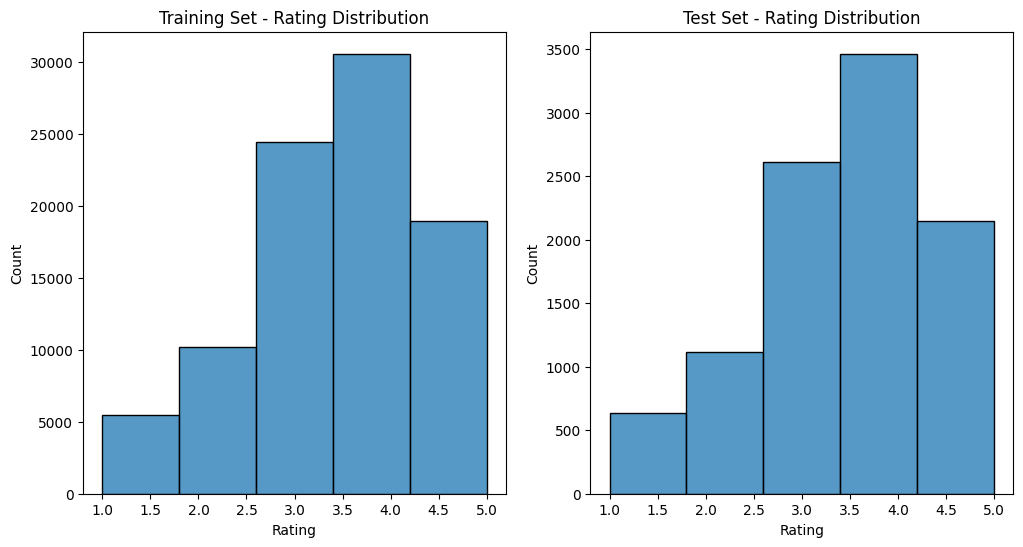

In [5]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(train_df["rating"], bins=5, kde=False)
plt.title("Training Set - Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")

plt.subplot(1, 2, 2)
sns.histplot(test_df["rating"], bins=5, kde=False)
plt.title("Test Set - Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

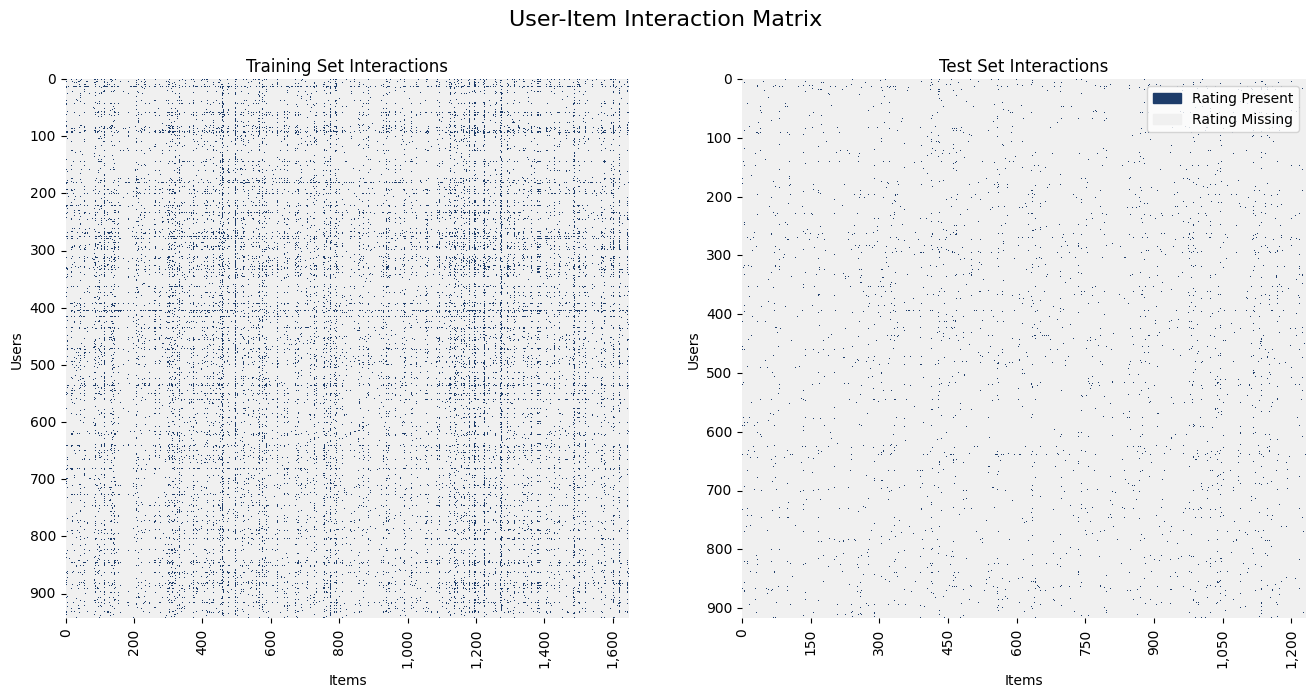

In [6]:
# Create interaction matrices
train_interaction_matrix = pd.pivot_table(
    train_df, index="user_index", columns="item_index", values="rating", aggfunc="size"
)
test_interaction_matrix = pd.pivot_table(
    test_df, index="user_index", columns="item_index", values="rating", aggfunc="size"
)

# Create boolean masks for present (not missing) values
train_mask = train_interaction_matrix.notna()
test_mask = test_interaction_matrix.notna()

# Create colormap
cmap = sns.color_palette(["#f0f0f0", "#1d3c6a"], as_cmap=True)

# Set figure size
plt.figure(figsize=(16, 7))  # width, height in inches
plt.suptitle("User-Item Interaction Matrix", fontsize=16)

# Heatmap for the training set
ax1 = plt.subplot(1, 2, 1)
sns.heatmap(train_mask, cbar=False, cmap=cmap)
ax1.set_title("Training Set Interactions")
ax1.set_xlabel("Items")
ax1.set_ylabel("Users")

# Heatmap for the test set
ax2 = plt.subplot(1, 2, 2)
sns.heatmap(test_mask, cbar=False, cmap=cmap)
ax2.set_title("Test Set Interactions")
ax2.set_xlabel("Items")
ax2.set_ylabel("Users")

# Create legend
present_patch = mpatches.Patch(color="#1d3c6a", label="Rating Present")
missing_patch = mpatches.Patch(color="#f0f0f0", label="Rating Missing")
plt.legend(handles=[present_patch, missing_patch], loc="upper right")

# Format and limit ticks for both heatmaps
formatter = ticker.FuncFormatter(lambda x, pos: "{:,.0f}".format(x))

for ax in [ax1, ax2]:
    ax.yaxis.set_major_locator(ticker.MaxNLocator(10))
    ax.xaxis.set_major_locator(ticker.MaxNLocator(10))
    ax.yaxis.set_major_formatter(formatter)
    ax.xaxis.set_major_formatter(formatter)

plt.show()

In [17]:
adj_matrix = preprocessor.create_adjacency_matrix(train_df)
norm_adj_matrix = preprocessor.normalize_adjacency_matrix(adj_matrix)
preprocessor.save_adjacency_matrix(
    norm_adj_matrix,
    os.path.join(save_directory, "movielens_100k_adj_mat"),
    chunk_size=len(train_df) * 2,
)

Saved chunk 0 of the normalized adjacency matrix.
